In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lumicks import pylake

%matplotlib inline

# FD curves

[Download this page as a Jupyter notebook](_downloads/6f57fb1b6e284fa9ce420e0488c35a31/fdcurves.ipynb)

The following code loads an HDF5 file and lists all of the FD curves inside of it:

In [93]:
from lumicks import pylake
import glob
files = glob.glob('*.h5', recursive = True)
print("found {} files in folder".format(len(files)))



for file in files: 
    file_new = pylake.File(file)
    fd_input = list(file_new.fdcurves)
    print(fd_input)
    #fd = file.fdcurves fd_input
    #plt.figure()
    #fd.plot_scatter()
    

      
file = pylake.File("20190426-180841 FD Curve FD mark 25 no spermine.h5")
file_name = list(file.fdcurves) # e.g. shows: "['baseline', '1', '2']"
print(file_name)

found 17 files in folder
['FD mark 16 multiple DNAs']
['FD mark 18 multiple DNAs']
['FD mark 19 repeat with DNAs from mark 18']
['FD mark 20 1mM spermine DNAs breaking stagnant spermine']
['FD mark 21 1mM spermine maybe 1 DNA  stagnant spermine']
['FD mark 22 1mM spermine repeat from DNA in mark 21  stagnant spermine']
['FD mark 25 no spermine']
['FD mark 26 1mM spermine 3 min incubation']
['FD mark 27 1mM spermine after first pull']
['FD mark 3 no spermine T50']
['FD mark 4 no spermine T50']
['FD mark 5 1mM spermine 5 min incubation']
['FD mark 6 1mM spermine subsequent']
['FD mark 7 1mM spermine subsequent subsequent']
['FD mark 8 DNA broke artifact of incorrect moon']
['FD multiple DNAs mark 15']
['FD repeat after mark 16']
['FD mark 25 no spermine']


In [97]:
from lumicks import pylake
import glob
file = pylake.File("20190426-180841 FD Curve FD mark 26 1mM spermine 3 min incubation.h5")

To visualizes an FD curve, you can use the built-in `.plot_scatter()` function:

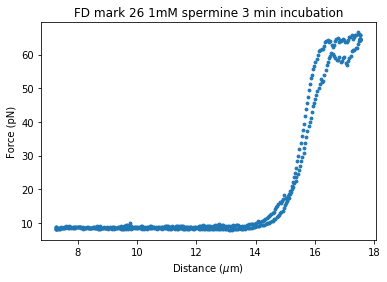

In [98]:
# Pick a single FD curve
fd = file.fdcurves['FD mark 26 1mM spermine 3 min incubation']
fd.plot_scatter()

Here, `.fdcurves` is a standard Python dictionary, so we can do standard `dict` thing with it. For example, we can iterate over all the FD curve in a file and plot them:

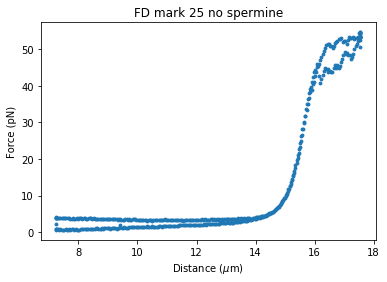

In [94]:
for name, fd in file.fdcurves.items():
    fd.plot_scatter()
    plt.savefig(name)

By default, the FD channel pair is `downsampled_force2` and `distance1`. This assumes that the force extension was done by moving trap 1, which is the most common. In that situation the force measured by trap 2 is more precise because that trap is static. The channels can be switched with the following code:

In [ ]:
alt_fd = fd.with_channels(force='1x', distance='2')
alt_fd.plot_scatter()

# or as quick one-liner for plotting
fd.with_channels(force='2y', distance='2').plot_scatter()

The raw data can be accessed as well:

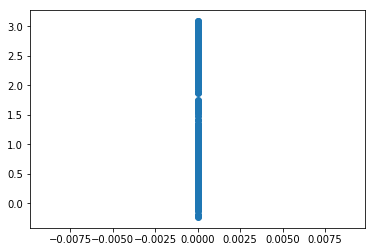

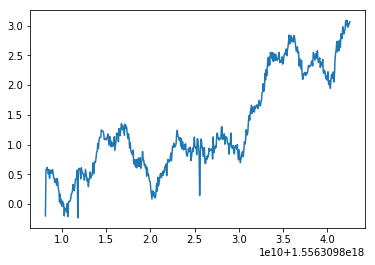

In [21]:
# Access the raw data: default force and distance channels
force = fd.f
distance = fd.d

# Access the raw data: specific channels
force = fd.downsampled_force1y
distance = fd.distance2
plt.figure()
# Plot manually: FD curve
plt.scatter(distance.data, force.data)
plt.figure()
# Plot manually: force timetrace
plt.plot(force.timestamps, force.data)